# Projet  :  Prise  de  décision  basée  sur  les  données  pour  une  campagne marketing bancaire

# Contexte du projet
Dans un secteur bancaire fortement concurrentiel, il est essentiel de cibler efficacement les clients susceptibles de souscrire à des produits financiers. L’objectif de ce projet est de mettre en place une approche basée sur les données et le machine learning pour identifier et convaincre les clients d’ouvrir des dépôts à terme.

---

# Objectifs

1. **Prédiction**  
   Déterminer si un client acceptera (« yes ») ou refusera (« no ») une offre de dépôt à terme.

2. **Exploration & Analyse**  
   Mener une analyse approfondie des données (démographiques, interactions passées, campagnes antérieures) pour dégager des tendances et insights.

3. **Méthodes Statistiques**  
   Utiliser des méthodes statistiques avancées (tests, intervalles de confiance, etc.) pour valider les résultats.

4. **Recommandations**  
   Proposer des stratégies marketing et des actions concrètes en s’appuyant sur les prédictions et les analyses effectuées.

---

# Données

Le jeu de données provient de la source : [Bank Marketing Data](https://archive.ics.uci.edu/dataset/222/bank+marketing). Il inclut notamment :

- Des informations **démographiques** (âge, emploi, statut marital, éducation).
- Des **indicateurs financiers** (solde moyen, crédits en cours).
- Des **données d’interaction** (canal de communication, durée du dernier contact, nombre de contacts).
- Le **résultat des campagnes passées** (succès, échec, non-contact).

---

## Description des Variables

| Variable  | Signification                                                         | Type de données    |
|-----------|----------------------------------------------------------------------|--------------------|
| **age**         | Âge du client (en années).                                       | Quantitatif (numérique) |
| **job**         | Type d’emploi (e.g. "admin.", "unemployed", "management", etc.). | Qualitatif (catégorique) |
| **marital**     | Statut matrimonial ("married", "single", "divorced").            | Qualitatif (catégorique) |
| **education**   | Niveau d’éducation ("primary", "secondary", "tertiary").         | Qualitatif (catégorique) |
| **default**     | Crédit en défaut ? ("yes"/"no").                                 | Qualitatif (binaire)     |
| **balance**     | Solde moyen annuel en euros.                                     | Quantitatif (numérique)  |
| **housing**     | Prêt immobilier ? ("yes"/"no").                                  | Qualitatif (binaire)     |
| **loan**        | Prêt personnel ? ("yes"/"no").                                   | Qualitatif (binaire)     |
| **contact**     | Type de communication lors du dernier contact ("telephone"/"cellular"). | Qualitatif (catégorique) |
| **day**         | Jour du dernier contact.                                         | Quantitatif (numérique)  |
| **month**       | Mois du dernier contact (e.g. "jan", "feb", etc.).               | Qualitatif (catégorique) |
| **duration**    | Durée du dernier contact en secondes.                            | Quantitatif (numérique)  |
| **campaign**    | Nombre de contacts réalisés durant la campagne.                  | Quantitatif (numérique)  |
| **pdays**       | Nombre de jours depuis le dernier contact dans une campagne précédente ( -1 si jamais contacté ). | Quantitatif (numérique)  |
| **previous**    | Nombre de contacts avant cette campagne.                         | Quantitatif (numérique)  |
| **poutcome**    | Résultat de la campagne précédente ("success", "failure", "unknown"). | Qualitatif (catégorique) |

**Variable cible** :

| Variable  | Signification                                                | Type de données              |
|-----------|-------------------------------------------------------------|------------------------------|
| **y**     | Le client a-t-il souscrit au dépôt à terme ? ("yes"/"no").  | Qualitatif (binaire)         |

---

### Remarques
- Les variables **quantitatives** (ou numériques) peuvent faire l’objet d’analyses statistiques (moyenne, médiane, écart-type, etc.).
- Les variables **qualitatives** (ou catégoriques) nécessitent souvent un encodage (e.g. one-hot encoding) pour être intégrées dans les algorithmes de machine learning.
- La variable **y** est la cible à prédire, représentant la décision finale du client.



# Méthodologie : Étapes CRISP-DM

Ce document présente le déroulement du projet en suivant la méthodologie CRISP-DM, avec des **questions** spécifiques pour chaque étape, le **code** Python associé et des **réponses** basées sur l’analyse des données.

---

## 1. Compréhension du contexte et des données

## Step 1 : Data Understanding

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [17]:

display(X.head())
display(y.head())


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


,y
0,no
1,no
2,no
3,no
4,no


##  Quelles informations générales peut-on obtenir sur les variables ?

In [18]:

display(X.info())
display(X.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


None

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Y a-t-il des valeurs manquantes (NaN) dans le dataset ?

In [15]:

missing_values_percent = (X.isna().sum() / len(X)) * 100
print(missing_values_percent)


age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
dtype: float64


## Step 2 :  Data Preparation 


## Comment gérer les valeurs manquantes ?

In [ ]:

df = X.copy()


threshold = 0.4  

missing_values_percent = (df.isna().sum() / len(df)) * 100
cols_to_drop = missing_values_percent[missing_values_percent > (threshold*100)].index

df.drop(columns=cols_to_drop, inplace=True)

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].value_counts().idxmax())

print("Colonnes supprimées :", cols_to_drop)
print("Valeurs manquantes après traitement :", df.isna().sum().sum())


Colonnes supprimées : Index(['poutcome'], dtype='object')
Valeurs manquantes après traitement : 0


## Comment détecter et traiter les valeurs aberrantes (outliers) ?

In [31]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_bool = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

outliers = pd.DataFrame((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))

print(outliers.sum())


age             487
balance        4729
day_of_week       0
duration       3235
campaign       3064
pdays          8257
previous       8257
dtype: int64


In [32]:
mask_no_outliers = ~outliers_bool.any(axis=1)
df_no_outliers = df[mask_no_outliers]
print("Dimensions initiales :", df.shape)
print("Dimensions après suppression des outliers :", df_no_outliers.shape)

df = df_no_outliers.copy()

Dimensions initiales : (45211, 15)
Dimensions après suppression des outliers : (28193, 15)


## Quelles variables supprimer pour cause de faible pertinence ?

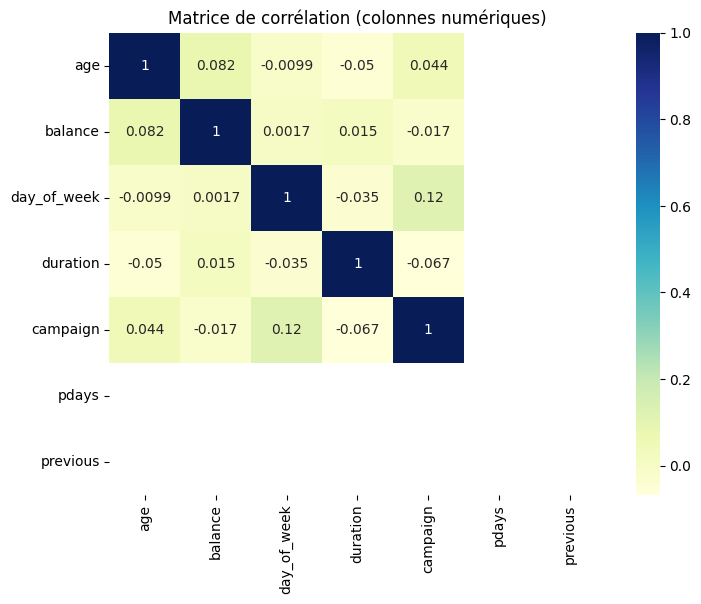

In [33]:
numeric_df = df.select_dtypes(include=['number'])


corr_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Matrice de corrélation (colonnes numériques)")
plt.show()


## Comment encoder les variables qualitatives ?

In [34]:
cat_cols = df.select_dtypes(include=[object]).columns

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Dimensions avant encodage :", df.shape)
print("Dimensions après encodage :", df_encoded.shape)


Dimensions avant encodage : (28193, 15)
Dimensions après encodage : (28193, 36)


In [37]:
df.dropna(axis=1, how='all', inplace=True)
print("Colonnes restantes :", numeric_df.columns.tolist())

Colonnes restantes : ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


## Pourquoi normaliser ou standardiser les variables numériques ?

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=[np.number]).columns

df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
age,28193.0,2.943688e-16,1.000018,-2.263547,-0.847163,-0.138971,0.771561,2.997307
balance,28193.0,-6.855163e-17,1.000018,-3.065946,-0.691965,-0.348188,0.376627,3.432152
day_of_week,28193.0,1.209735e-16,1.000018,-1.768061,-0.930402,0.026923,0.744917,1.821907
duration,28193.0,8.568954e-17,1.000018,-1.474012,-0.749050,-0.260956,0.514251,3.141341
campaign,28193.0,-1.814602e-16,1.000018,-0.886761,-0.886761,-0.141391,0.603979,2.840088
pdays,28193.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
previous,28193.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. Analyses Statistiques

Cette section détaille les étapes d’analyses statistiques univariées, bivariées et multivariées, avec **exemples de code** et **discussion des résultats**.

---

## 3.1 Analyse univariée

### 3.1.1 Calcul des statistiques descriptives (moyenne, médiane, écart-type) pour les variables numériques


In [40]:
desc_stats = df[numeric_cols].describe().T
print(desc_stats)

               count        mean         std     min    25%    50%    75%  \
age          28193.0   40.373639    9.884503    18.0   32.0   39.0   48.0   
balance      28193.0  606.670344  831.950484 -1944.0   31.0  317.0  920.0   
day_of_week  28193.0   15.775015    8.356767     1.0    8.0   16.0   22.0   
duration     28193.0  205.355833  139.320091     0.0  101.0  169.0  277.0   
campaign     28193.0    2.189692    1.341640     1.0    1.0    2.0    3.0   
pdays        28193.0   -1.000000    0.000000    -1.0   -1.0   -1.0   -1.0   
previous     28193.0    0.000000    0.000000     0.0    0.0    0.0    0.0   

                max  
age            70.0  
balance      3462.0  
day_of_week    31.0  
duration      643.0  
campaign        6.0  
pdays          -1.0  
previous        0.0  


### 3.1.2 Distribution des variables catégoriques

In [41]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"--- Distribution de la variable {col} ---")
    print(df[col].value_counts(dropna=False))
    print("\n")


--- Distribution de la variable job ---
job
blue-collar      6538
management       5603
technician       4801
admin.           3269
services         2743
retired          1143
entrepreneur      966
self-employed     958
housemaid         821
unemployed        819
student           532
Name: count, dtype: int64


--- Distribution de la variable marital ---
marital
married     16971
single       7888
divorced     3334
Name: count, dtype: int64


--- Distribution de la variable education ---
education
secondary    16004
tertiary      7791
primary       4398
Name: count, dtype: int64


--- Distribution de la variable default ---
default
no     27565
yes      628
Name: count, dtype: int64


--- Distribution de la variable housing ---
housing
yes    15633
no     12560
Name: count, dtype: int64


--- Distribution de la variable loan ---
loan
no     23233
yes     4960
Name: count, dtype: int64


--- Distribution de la variable contact ---
contact
cellular     26702
telephone     1491
Name: cou

### 3.1.3 Visualisation des variables univariées (histogrammes et boxplots)

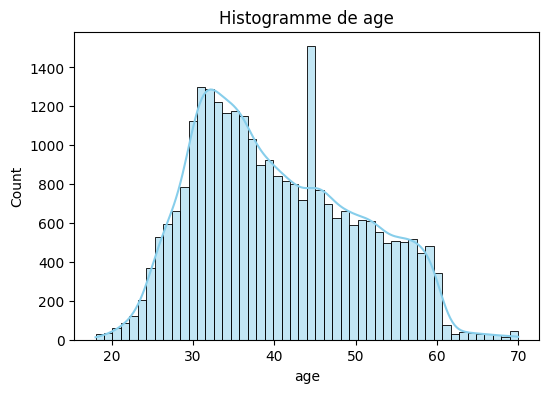

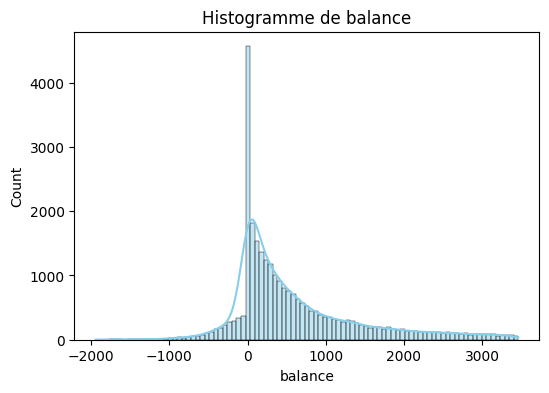

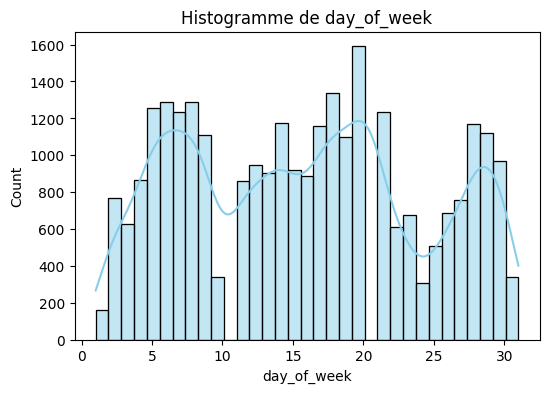

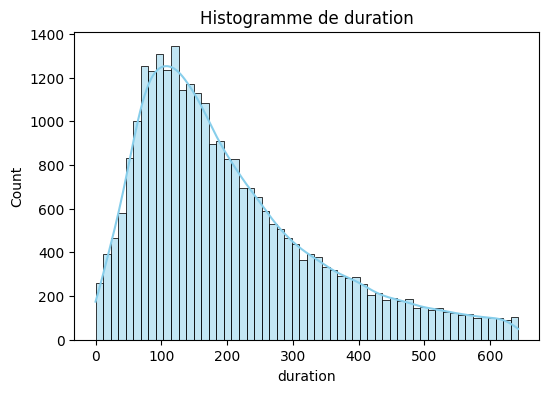

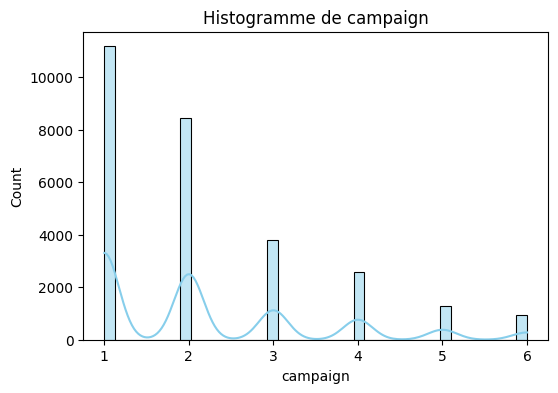

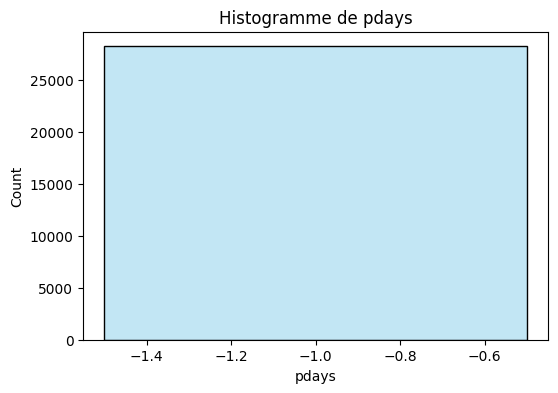

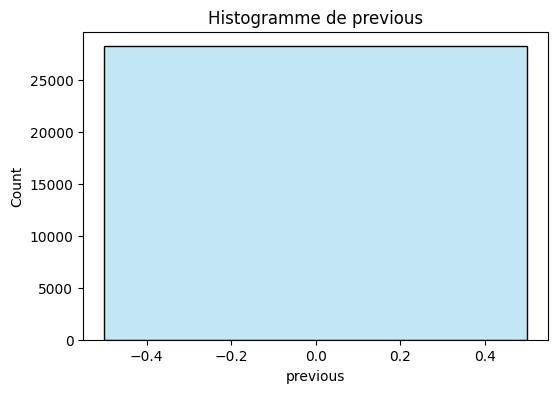

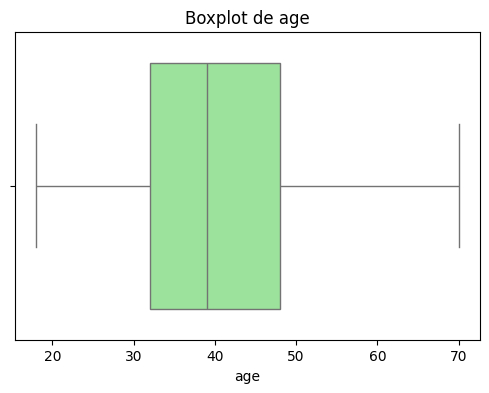

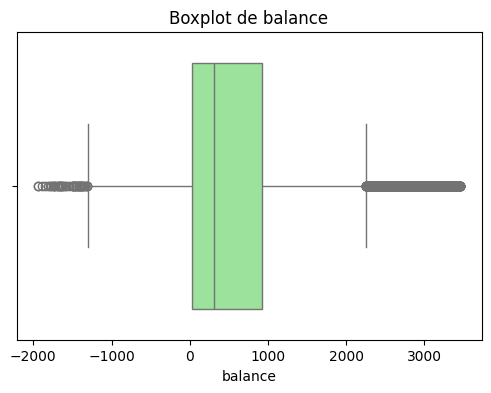

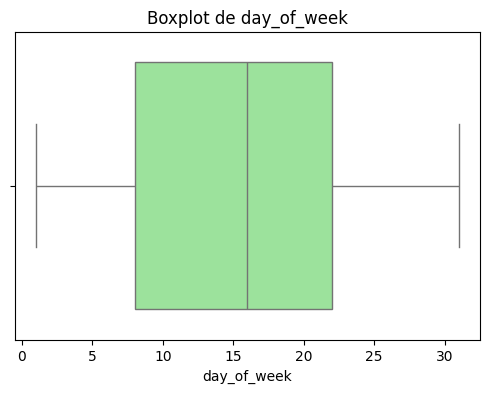

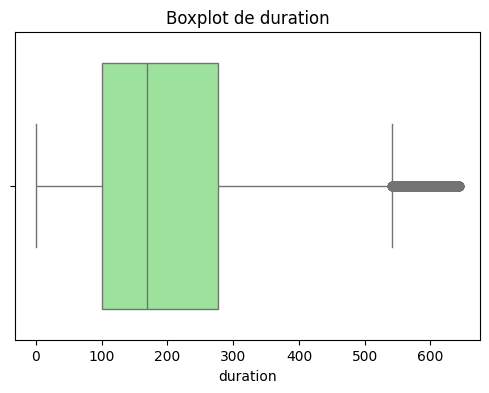

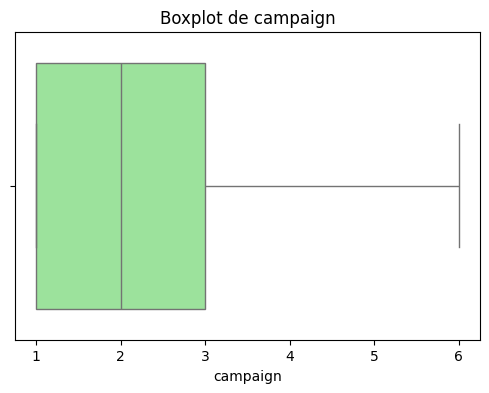

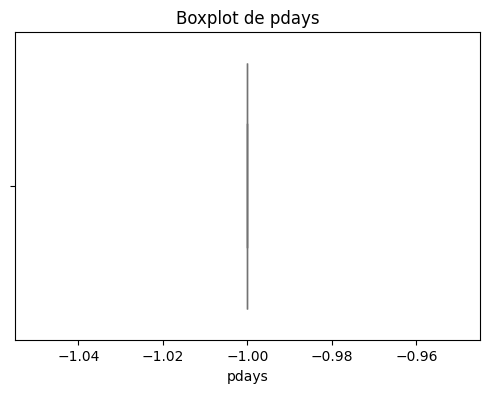

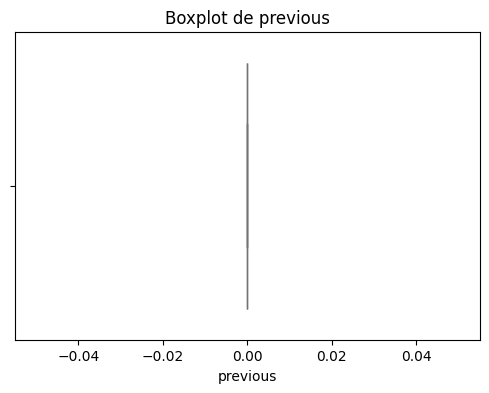

In [42]:

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f"Histogramme de {col}")
    plt.show()


for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()


### 3.1.4 Tests de normalité (Kolmogorov-Smirnov, Shapiro-Wilk)

In [43]:
from scipy.stats import shapiro, kstest, norm

for col in numeric_cols:
    stat_sw, p_sw = shapiro(df[col].dropna())
    
    mean_col = df[col].mean()
    std_col = df[col].std()
    stat_ks, p_ks = kstest((df[col].dropna() - mean_col)/std_col, 'norm')
    
    print(f"Variable: {col}")
    print(f"  Shapiro-Wilk Test: stat={stat_sw:.4f}, p-value={p_sw:.4e}")
    print(f"  Kolmogorov-Smirnov Test: stat={stat_ks:.4f}, p-value={p_ks:.4e}\n")


c:\Users\ilyes\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28193.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\ilyes\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Variable: age
  Shapiro-Wilk Test: stat=0.9687, p-value=1.6069e-59
  Kolmogorov-Smirnov Test: stat=0.0934, p-value=2.3074e-214

Variable: balance
  Shapiro-Wilk Test: stat=0.8595, p-value=2.5897e-92
  Kolmogorov-Smirnov Test: stat=0.1545, p-value=0.0000e+00

Variable: day_of_week
  Shapiro-Wilk Test: stat=0.9561, p-value=3.0830e-66
  Kolmogorov-Smirnov Test: stat=0.0965, p-value=4.3460e-229

Variable: duration
  Shapiro-Wilk Test: stat=0.9134, p-value=6.2774e-81
  Kolmogorov-Smirnov Test: stat=0.1084, p-value=6.1354e-289

Variable: campaign
  Shapiro-Wilk Test: stat=0.8121, p-value=1.5943e-99
  Kolmogorov-Smirnov Test: stat=0.2520, p-value=0.0000e+00

Variable: pdays
  Shapiro-Wilk Test: stat=1.0000, p-value=1.0000e+00
  Kolmogorov-Smirnov Test: stat=nan, p-value=nan

Variable: previous
  Shapiro-Wilk Test: stat=1.0000, p-value=1.0000e+00
  Kolmogorov-Smirnov Test: stat=nan, p-value=nan



## Step 3 : Modeling 

# Step 4 : Evaluaion 

# Step 5 : Deployment 